In [6]:
src = {'input_size':784, 
       'hidden_size':500,
       'num_classes':10,
       'num_epochs':5,
       'batch_size':100,
       'learning_rate':1e-3}

# Dependencies
- Linux, MacOS, Windows  
  * https://pytorch.org/
- Help  
  * https://pytorch.org/docs/stable/index.html
- Community  
  * https://discuss.pytorch.org/

## 텐서 (Tensors)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# import torchvision.datasets as dsets
# import torchvision.transforms as transforms
from torch.autograd import Variable
# 파이토치 0.4.0.부터는 Variable 선언을 해주지 않아도 된다!!

In [2]:
# 초기화되지 않은 5 x 3 행렬
x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00,  1.2892e-42],
        [ 0.0000e+00,  7.0065e-45,  0.0000e+00],
        [-7.3188e+35,  6.4600e-43,  0.0000e+00],
        [ 0.0000e+00,  9.1843e-41,  0.0000e+00],
        [-3.8516e+36,  6.4600e-43,  0.0000e+00]])


In [5]:
# 랜덤으로 초기화된 행렬
x = torch.rand(5, 3)
print(x)
# 0으로 채워지고 long 데이터 타입을 가지는 행렬
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[ 0.3238,  0.9343,  0.5000],
        [ 0.4944,  0.0835,  0.8020],
        [ 0.4005,  0.4990,  0.3290],
        [ 0.2978,  0.7581,  0.7287],
        [ 0.4668,  0.9736,  0.7780]])
tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])


In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([ 5.5000,  3.0000])


In [7]:
# 이미 존재하는 텐서를 기반으로 새로운 텐서 생성가능
# 입력 텐서의 type들이 사용자에 의해 새롭게 제공되지 않는 이상 기존의 값들을 사용
x = x.new_ones(5, 3, dtype=torch.double)
print(x) # new_* methods take in sizes

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x, dtype=torch.float) # override dtype
print(x)      # result has the same size
print(x.size())

tensor([[-0.0318,  1.0873, -0.4568],
        [ 1.3045, -0.0397,  1.5660],
        [ 0.4112,  1.7982, -0.0979],
        [ 1.4417,  0.6186, -0.6560],
        [ 1.5135,  0.8928,  0.6553]])
torch.Size([5, 3])


## 연산 (Operations)

In [9]:
y = torch.rand(5, 3)
print(x + y)
# print(torch.add(x, y)) # 완전히 같다

tensor([[ 0.9478,  1.2284, -0.4353],
        [ 1.5481,  0.2940,  2.3577],
        [ 0.4527,  1.9597,  0.6987],
        [ 1.7072,  0.9176, -0.4382],
        [ 2.1496,  1.8527,  1.1418]])


In [10]:
# 더하기 : 파라미터로(결과가 저장되는) 결과 텐서(output tensor) 이용
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.9478,  1.2284, -0.4353],
        [ 1.5481,  0.2940,  2.3577],
        [ 0.4527,  1.9597,  0.6987],
        [ 1.7072,  0.9176, -0.4382],
        [ 2.1496,  1.8527,  1.1418]])


* 텐서를 제자리에서 변조하는 연산은 _문자를 이용해 postfix(연산자를 피연산자의 뒷쪽에 표시)로 표기한다.
* 예를 들면 x.copy_(y)와 x.t_()는 x를 변경시킨다

In [11]:
# 더하기 : 제자리(in-place)
# adds x to y
y.add_(x); print(y)

tensor([[ 0.9478,  1.2284, -0.4353],
        [ 1.5481,  0.2940,  2.3577],
        [ 0.4527,  1.9597,  0.6987],
        [ 1.7072,  0.9176, -0.4382],
        [ 2.1496,  1.8527,  1.1418]])


In [15]:
# Resizing : 텐서 사이즈를 재변경하거나, 모양(shape)을 변경하고 싶다면 view 사용
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())
print(y); print(z)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([-0.3903,  0.3153, -0.1570,  1.2774, -1.2657, -1.5682,  0.8592,
        -0.8884,  0.9995,  0.3671, -0.4722, -0.0689,  0.7942,  0.2795,
        -1.0282,  0.5613])
tensor([[-0.3903,  0.3153, -0.1570,  1.2774, -1.2657, -1.5682,  0.8592,
         -0.8884],
        [ 0.9995,  0.3671, -0.4722, -0.0689,  0.7942,  0.2795, -1.0282,
          0.5613]])


## NumPy 변환 (Bridge)
* 토치 텐서와 배열은 근본적으로 메모리 위치를 공유하기 때문에 하나를 변경하면 다른 하나도 변경된다.

In [16]:
# Tensor -> Array
a = torch.ones(5)
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [17]:
a.add_(1) # a를 참조하고 있는 b도 변한다
print(a)
print(b)

tensor([ 2.,  2.,  2.,  2.,  2.])
[2. 2. 2. 2. 2.]


In [18]:
# Array -> Tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)


In [19]:
# 텐서는 .to 메소드를 이용해 (CUDA를 지원하는)그 어떠한 디바이스로도 옮길 수 있다
# let us run this cell only if CUDA is available
# We will use 'torch.device' objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device('cuda')
    y = torch.ones_like(x, device=device)   # a CUDA device object
    x = x.to(device)                        # directly create a tensor on GPU
    z = x + y                               # or just use strings ''.to('cuda')
    print(z)
    print(z.to('cpu', torch.double))        # ''.to'' cna also change dtype together!

## Autograd : 자동 미분 (Automatic Diff)
**autograd** 패키지는 텐서의 모든 연사에 대하여 자동 미분을 제공한다. 이 패키지는 실행 시점에 정의되는(define-by-run) 프레임워크인데 다시 말하면 코드가 어떻게 실행되는지에 따라 역전파(backprop)가 정의되며, 각각의 반복마다 역전파가 달라질 수 있다는 것이다.

* 텐서플로는 정의된 다음 실행되는(defined-and-run) 프레임워크인데 이는 그래프 구조에서 미리 조건과 반복을 정의하고 나서 실행된다.
* PyTorch를 비롯한 Chainer, DyNet 등은 define-by-run 프레임워크이다.

## torch.Tensor는 패키지에서 가장 중심이 되는 클래스

-- 텐서의 속성 중 하나인 **.requires_grad**를 **True**로 세팅하면, 텐서의 모든 연산에 대해 추적을 시작한다.

-- 계산 작업이 모두 수행됐다면 **.backward()** 를 호출하여 모든 그라디언트들을 자동으로 계산할 수 있다.

-- 이 텐서를 위한 그라디언트는 **.grad** 속성에 누적되어 저장된다.

-- 텐서에 대해 기록(history) 추적을 중지하려면 **.detach()** 를 호출해 현재의 계산 기록으로부터 분리시키고 이후에 일어나는 계산들은 추적되지 않게 할 수 있다.

-- 기록 추적(및 메모리 사용)에 대해 방지를 하려면, 코드 블럭을 **with torch.no_grad():** 로 래핑(wrap)할 수 있다. 이는 특히 모델을 평가할 때 엄청난 도움이 되는데, 왜냐하면 모델은 requires_grad=True 속성이 적용된 학습 가능한 파라미터를 가지고 있을 수 있으나 우리는 그라디언트가 필요하지 않기 때문이다.

-- 자동 미분을 위해 매우 중요한 클래스가 하나 더 있는데 바로 **Function**이다.

-- **Tensor**와 **Function**은 상호 연결되어 있으며, 비순환(비주기) 그래프를 생성하는데, 이 그래프는 계싼 기록 전체에 대하여 인코딩을 수행한다. 각 변수는 **Tensor**를 생성한 **Function**을 참조하는 **.grad_fn** 속성을 가지고 있다. (단, 사용자에 의해 생성된 텐서는 제외한다 ; 해당 텐서들은 **grad_fn** 자체가 **None** 상태이다)

-- 만약 도함수(derivatives)들을 계산하고 싶다면, Tensor의 **.backward()** 를 호출하면 된다. 만약 **Tensor**가 스칼라 형태라면, **backward()** 사용에 있어 그 어떠한 파라미터도 필요하지 않는다. 그러나 한 개 이상의 요소를 가지고 있다면 올바른 모양(matching shape)의 텐서인 **gradient** 파라미터를 명시할 필요가 있다.

In [1]:
import torch
# 텐서를 생성하고 requires~ 로 세팅해 계산 추적한다.
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [2]:
y = x+2
print(y)
# y는 연산의 결과로서 생성된 것이므로 grad_fn을 가지고 있다.
print(y.grad_fn)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [3]:
z = y*y
out = z.sum()
print(z, out)

tensor([[ 9.,  9.],
        [ 9.,  9.]]) tensor(36.)


**requires_grad(...)** 은 이미 존재하는 텐서의 **requires_grad** 플래그를 제자리(in-place)에서 변경한다.

In [38]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print('-----1st-----')
print(a.requires_grad)
a.requires_grad_(True)
print('-----2nd-----')
print(a.requires_grad)
b = (a * a).sum()
print('-----3rd-----')
print(b.grad_fn)

-----1st-----
False
-----2nd-----
True
-----3rd-----


## 그라디언트 (Gradients)
* 다시 돌아와서 이제 **out**은 하나의 스칼라 값을 가지고 있기 때문에 **out.bacward()**는 **out.backward(torch.tensor(1))**와 동등한 결과를 리턴한다.

In [4]:
out.backward()
print(x.grad)

tensor([[ 6.,  6.],
        [ 6.,  6.]])


In [42]:
x = torch.ones(3, requires_grad=True)
y = x**2
z = y*3
print(z)
gradient = torch.tensor([0.1, 1, 10], dtype=torch.float)
# backward 인자가 곱해져 그라디언트 값 출력
z.backward(gradient)
print(x.grad)

tensor([ 3.,  3.,  3.])
tensor([  0.6000,   6.0000,  60.0000])


## nn과 nn.functional

### nn의 기능들 (weight를 자동 설정해줌, conv2d의 경우)
* Parameters    
* Linear    
* Container    
* Dropout    
* Conv  
* Sparse    
* Pooling    
* Distance    
* Padding    
* Loss  
* Non-linear Activation    
* Vision    
* Normalization  
* Data Parallel   
* Utilities   
* Recurrent  

### nn.functional의 기능들(외부에서 만든 filter, weight를 넣어야 함)
* Conv    
* Pooling   
* Non-linear activation   
* Normalization  
* Linear function(=fully connected layer)  
* Dropout  
* Distance
* Loss   
* Vision  

In [56]:
#### nn.functional ####
inp = torch.ones(1,1,3,3, requires_grad = True)
filter = torch.ones(1,1,3,3)
print(inp)

tensor([[[[ 1.,  1.,  1.],
          [ 1.,  1.,  1.],
          [ 1.,  1.,  1.]]]])


In [57]:
out = F.conv2d(inp, filter)
print("----output----")
print(out)
out.backward()
print("----grad_fn----")
print(out.grad_fn)
print("----Gradient----")
print(inp.grad)

----output----
tensor([[[[ 9.]]]])
----grad_fn----
----Gradient----
tensor([[[[ 1.,  1.,  1.],
          [ 1.,  1.,  1.],
          [ 1.,  1.,  1.]]]])


In [58]:
filter += 1
out = F.conv2d(inp, filter)
print("----output----")
print(out)
out.backward()
print("----grad_fn----")
print(out.grad_fn)
print("----Gradient----")
print(inp.grad)

----output----
tensor([[[[ 18.]]]])
----grad_fn----
----Gradient----
tensor([[[[ 3.,  3.,  3.],
          [ 3.,  3.,  3.],
          [ 3.,  3.,  3.]]]])


In [50]:
#### nn ####
inp = torch.ones(1,1,3,3, requires_grad = True)
func = nn.Conv2d(1, 1, 3) # (input_channel, output_channel, filter_size or kernel_size)
func.weight

Parameter containing:
tensor([[[[-0.0186, -0.1918, -0.0093],
          [ 0.2435,  0.0279,  0.1439],
          [ 0.1880, -0.2797, -0.0804]]]])

In [51]:
out = func(inp)
print(out)
# nn.Conv2d는 자동으로 bias를 포함시키기 때문에 값이 위의 weight 총합 값과 다름
print(inp.grad)

tensor([[[[ 0.3047]]]])
None


In [52]:
out.backward()
print(inp.grad) # 그냥 weight 자체가 산출됨

tensor([[[[-0.0186, -0.1918, -0.0093],
          [ 0.2435,  0.0279,  0.1439],
          [ 0.1880, -0.2797, -0.0804]]]])


In [53]:
### 다양한 활성함수들
inp2 = torch.randn(1,1,3,3)
a = F.relu(inp2)
print("---- ReLU activation ----")
print(a)
b = nn.MaxPool2d(2, stride=1)
print("---- Max Pooling 2 x 2 by stride 1 ----")
bb = b(a)
print(bb)
c = F.sigmoid(bb)
print("---- Sigmoid ----")
print(c)
d = F.tanh(bb)
print("---- Tanh of Max Pooled image ----")
print(d)
e = nn.AvgPool2d(2, stride=1)
print("---- Average Pooling 2 x 2 by stride 1 ----")
ee = e(d)
print(ee)

---- ReLU activation ----
tensor([[[[ 0.0000,  1.2200,  0.0000],
          [ 2.5813,  0.7554,  0.0000],
          [ 0.6348,  0.3241,  0.7504]]]])
---- Max Pooling 2 x 2 by stride 1 ----
tensor([[[[ 2.5813,  1.2200],
          [ 2.5813,  0.7554]]]])
---- Sigmoid ----
tensor([[[[ 0.9296,  0.7721],
          [ 0.9296,  0.6804]]]])
---- Tanh of Max Pooled image ----
tensor([[[[ 0.9886,  0.8396],
          [ 0.9886,  0.6384]]]])
---- Average Pooling 2 x 2 by stride 1 ----
tensor([[[[ 0.8638]]]])


In [54]:
# 이 일련의 과정을 한 번에 클래스로 묶어서 
# 처리하도록 직접 모델을 설계한다!
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.Max_pool = nn.MaxPool2d(2, stride=1)
        self.Avg_pool = nn.AvgPool2d(2, stride=1)
    def forward(self, x):
        x = F.relu(x)
        x = self.Max_pool(x)
        x = F.tanh(x)
        x = self.Avg_pool(x)
        return x

In [55]:
out_x = model()
out_x(inp2)

tensor([[[[ 0.8638]]]])

## Data Loader & NN making

### DataLoader (Input value setting?)
* 입력은 어떻게 정의해?
* batch나 epoch는 어떻게 설정해?
* 전처리도 직접 하고 싶은데?
* MNIST, CIFAR-10 이런 거 말고 내 데이터를 직접 넣고 싶은데?ㅠㅠ

1. **torchvision**을 이용해 CIFAR-10의 학습, 평가 데이터셋을 로드하여 정규화한다.
2. CNN을 정의한다.
3. 손실 함수를 정의한다.
4. 학습 데이터를 이용해 학습시킨다.
5. 평가 데이터셋을 이용해 평가한다.

## 다양한 Loss함수들 (torch.nn.XXXX)
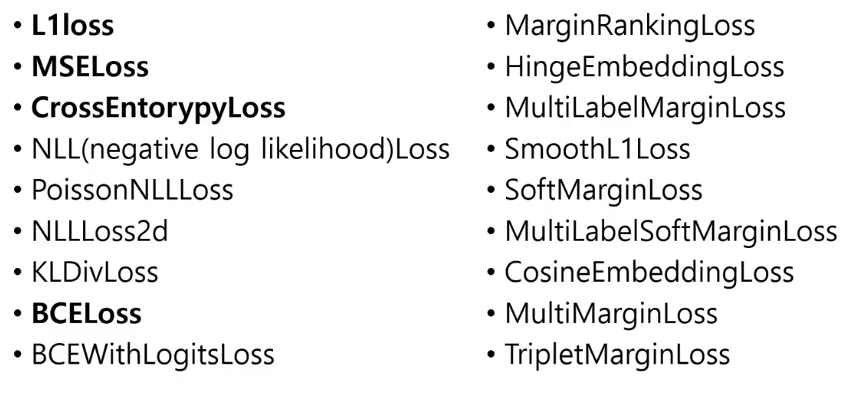

## MNIST 분류

In [4]:
# %matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import numpy as np

import torchvision
import torchvision.transforms as transforms

In [24]:
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [25]:
# MNIST Dataset 
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

train_dataset = torchvision.datasets.MNIST(root='./mnist', 
                            train=True, 
                            download=False,
                            transform=trans)

test_dataset = torchvision.datasets.MNIST(root='./mnist', 
                           train=False, 
                           download=False,
                           transform=trans)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [26]:
# Neural Network Model (1 hidden layer)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
net = Net(input_size, hidden_size, num_classes)

In [27]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [28]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = images.view(-1, 28*28)
        labels = labels
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
print('Training Completed')

C:\Users\ingulbull\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/5], Step [100/600], Loss: 0.4591
Epoch [1/5], Step [200/600], Loss: 0.4718
Epoch [1/5], Step [300/600], Loss: 0.1024
Epoch [1/5], Step [400/600], Loss: 0.2790
Epoch [1/5], Step [500/600], Loss: 0.1909
Epoch [1/5], Step [600/600], Loss: 0.1867
Epoch [2/5], Step [100/600], Loss: 0.1854
Epoch [2/5], Step [200/600], Loss: 0.2091
Epoch [2/5], Step [300/600], Loss: 0.1226
Epoch [2/5], Step [400/600], Loss: 0.2661
Epoch [2/5], Step [500/600], Loss: 0.1993
Epoch [2/5], Step [600/600], Loss: 0.1782
Epoch [3/5], Step [100/600], Loss: 0.1437
Epoch [3/5], Step [200/600], Loss: 0.1539
Epoch [3/5], Step [300/600], Loss: 0.1242
Epoch [3/5], Step [400/600], Loss: 0.1250
Epoch [3/5], Step [500/600], Loss: 0.0532
Epoch [3/5], Step [600/600], Loss: 0.0526
Epoch [4/5], Step [100/600], Loss: 0.0675
Epoch [4/5], Step [200/600], Loss: 0.0719
Epoch [4/5], Step [300/600], Loss: 0.1087
Epoch [4/5], Step [400/600], Loss: 0.0203
Epoch [4/5], Step [500/600], Loss: 0.0471
Epoch [4/5], Step [600/600], Loss:

In [29]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [30]:
net

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

## 내 데이터셋을 넣는 방법

In [11]:
# 나의 데이터셋을 넣는 방법
trans2 = transforms.Compose([transforms.Resize((100, 100)), 
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset2 = torchvision.datasets.ImageFolder(root='./dogs', transform=trans2)

In [12]:
len(trainset2)

8

In [13]:
trainloader2 = DataLoader(trainset2, batch_size=8, shuffle=False, num_workers=2)
dataiter2 = iter(trainloader2)
images2, labels2 = dataiter2.next()

torch.Size([8, 3, 100, 100])
torch.Size([8, 3, 100, 100])
torch.Size([3, 104, 818])


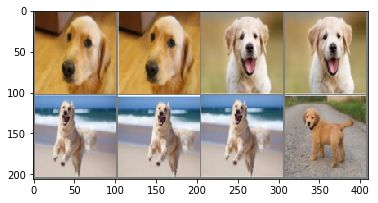

In [14]:
print(images2.shape)
imshow(torchvision.utils.make_grid(images2, nrow=4))
print(images2.shape)
print( (torchvision.utils.make_grid(images2)).shape )